# Module 4 - Algo Trading using Classification


### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band.
  Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band. 
  Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band.
  Short' if the stock price is above the upper Bollinger band.

>Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each) 

>Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"BAJAJELEC.csv")
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,BAJAJELEC,EQ,15-May-2017,350.75,351.20,352.30,339.10,342.00,341.15,344.83,150265,51815366.05,2733,91705,61.03
1,BAJAJELEC,EQ,16-May-2017,341.15,342.90,350.50,341.65,346.60,347.00,346.14,118849,41138046.60,2671,53340,44.88
2,BAJAJELEC,EQ,17-May-2017,347.00,347.10,352.00,345.85,349.50,349.85,349.90,108592,37996454.75,2259,46366,42.70
3,BAJAJELEC,EQ,18-May-2017,349.85,346.95,346.95,331.50,336.00,334.10,339.31,158652,53831647.20,3454,91087,57.41
4,BAJAJELEC,EQ,19-May-2017,334.10,339.05,344.00,332.00,335.50,336.20,338.64,129244,43767310.50,3097,47468,36.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,BAJAJELEC,EQ,07-May-2019,557.85,561.00,565.00,552.05,558.20,557.75,557.86,68237,38066482.60,5173,21908,32.11
490,BAJAJELEC,EQ,08-May-2019,557.75,561.00,561.00,530.00,531.00,534.45,544.69,160037,87171061.90,11144,39062,24.41
491,BAJAJELEC,EQ,09-May-2019,534.45,531.00,535.40,525.50,530.70,531.85,530.82,81531,43278252.70,3990,32290,39.60
492,BAJAJELEC,EQ,10-May-2019,531.85,528.00,545.00,521.60,543.45,540.90,533.29,177917,94880470.80,7768,31813,17.88


In [8]:
df['14 Day MA'] = df['Close Price'].rolling(window=14).mean()
df['30 Day STD'] = df['Close Price'].rolling(window=20).std()
df['Upper Band'] = df['14 Day MA'] + (df['30 Day STD'] * 2)
df['Lower Band'] = df['14 Day MA'] - (df['30 Day STD'] * 2)
df = df.dropna()
df['Mid Band'] = (df['Upper Band']+df['Lower Band'])/2
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band
57,BAJAJELEC,EQ,03-Aug-2017,329.00,329.90,336.00,326.20,327.00,328.25,330.82,444329,1.469917e+08,8318,105055,23.64,333.725000,4.821331,343.367663,324.082337,333.725000
58,BAJAJELEC,EQ,04-Aug-2017,328.25,325.00,330.70,321.50,325.70,325.90,326.63,77798,2.541108e+07,1989,26446,33.99,332.946429,5.006059,342.958548,322.934310,332.946429
59,BAJAJELEC,EQ,07-Aug-2017,325.90,330.70,334.75,328.15,332.45,331.95,331.77,81490,2.703600e+07,1650,50666,62.17,332.942857,4.976055,342.894967,322.990747,332.942857
60,BAJAJELEC,EQ,08-Aug-2017,331.95,332.05,338.50,326.00,331.00,329.85,333.63,162378,5.417373e+07,2871,64647,39.81,332.710714,4.863400,342.437514,322.983915,332.710714
61,BAJAJELEC,EQ,09-Aug-2017,329.85,329.85,330.70,316.70,317.90,319.95,324.83,67710,2.199391e+07,2595,48574,71.74,331.607143,5.684267,342.975677,320.238608,331.607143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,BAJAJELEC,EQ,07-May-2019,557.85,561.00,565.00,552.05,558.20,557.75,557.86,68237,3.806648e+07,5173,21908,32.11,565.246429,12.436750,590.119929,540.372928,565.246429
490,BAJAJELEC,EQ,08-May-2019,557.75,561.00,561.00,530.00,531.00,534.45,544.69,160037,8.717106e+07,11144,39062,24.41,563.689286,12.789401,589.268089,538.110483,563.689286
491,BAJAJELEC,EQ,09-May-2019,534.45,531.00,535.40,525.50,530.70,531.85,530.82,81531,4.327825e+07,3990,32290,39.60,560.842857,13.783679,588.410215,533.275499,560.842857
492,BAJAJELEC,EQ,10-May-2019,531.85,528.00,545.00,521.60,543.45,540.90,533.29,177917,9.488047e+07,7768,31813,17.88,558.167857,13.089338,584.346532,531.989182,558.167857


In [10]:
def select_buy(df):
    if df['Close Price'] < df['Lower Band']:
        return "Buy"
    if df['Close Price'] > df['Lower Band'] and df['Close Price'] < df['Mid Band']:
        return "Hold Buy/ Liquidate Short"
    if df['Close Price'] > df['Mid Band'] and df['Close Price'] < df['Upper Band']:
        return "Hold Short/ Liquidate Buy"
    if df['Close Price'] > df['Upper Band']:
        return "Short"
df = df.assign(Call = df.apply(select_buy, axis=1))
df

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,...,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,14 Day MA,30 Day STD,Upper Band,Lower Band,Mid Band,Call
57,BAJAJELEC,EQ,03-Aug-2017,329.00,329.90,336.00,326.20,327.00,328.25,330.82,...,1.469917e+08,8318,105055,23.64,333.725000,4.821331,343.367663,324.082337,333.725000,Hold Buy/ Liquidate Short
58,BAJAJELEC,EQ,04-Aug-2017,328.25,325.00,330.70,321.50,325.70,325.90,326.63,...,2.541108e+07,1989,26446,33.99,332.946429,5.006059,342.958548,322.934310,332.946429,Hold Buy/ Liquidate Short
59,BAJAJELEC,EQ,07-Aug-2017,325.90,330.70,334.75,328.15,332.45,331.95,331.77,...,2.703600e+07,1650,50666,62.17,332.942857,4.976055,342.894967,322.990747,332.942857,Hold Buy/ Liquidate Short
60,BAJAJELEC,EQ,08-Aug-2017,331.95,332.05,338.50,326.00,331.00,329.85,333.63,...,5.417373e+07,2871,64647,39.81,332.710714,4.863400,342.437514,322.983915,332.710714,Hold Buy/ Liquidate Short
61,BAJAJELEC,EQ,09-Aug-2017,329.85,329.85,330.70,316.70,317.90,319.95,324.83,...,2.199391e+07,2595,48574,71.74,331.607143,5.684267,342.975677,320.238608,331.607143,Buy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,BAJAJELEC,EQ,07-May-2019,557.85,561.00,565.00,552.05,558.20,557.75,557.86,...,3.806648e+07,5173,21908,32.11,565.246429,12.436750,590.119929,540.372928,565.246429,Hold Buy/ Liquidate Short
490,BAJAJELEC,EQ,08-May-2019,557.75,561.00,561.00,530.00,531.00,534.45,544.69,...,8.717106e+07,11144,39062,24.41,563.689286,12.789401,589.268089,538.110483,563.689286,Buy
491,BAJAJELEC,EQ,09-May-2019,534.45,531.00,535.40,525.50,530.70,531.85,530.82,...,4.327825e+07,3990,32290,39.60,560.842857,13.783679,588.410215,533.275499,560.842857,Buy
492,BAJAJELEC,EQ,10-May-2019,531.85,528.00,545.00,521.60,543.45,540.90,533.29,...,9.488047e+07,7768,31813,17.88,558.167857,13.089338,584.346532,531.989182,558.167857,Hold Buy/ Liquidate Short


In [18]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train_X = df[['Upper Band','Lower Band','Mid Band','Close Price']]
transfomed_label = le.fit_transform(df[['Call']])
train_Y = transfomed_label.reshape(-1,1)

In [19]:
from sklearn.linear_model import LogisticRegression  
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_Y.ravel())
LR.predict(train_X) 
print("Logistic Regression")
round(LR.score(train_X,train_Y), 4)

Logistic Regression


0.9771

In [20]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(train_X, train_Y)
SVM.predict(train_X)
print("Support Vector Machines")
round(SVM.score(train_X,train_Y), 4)

Support Vector Machines


0.9085

In [21]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4)

Random Forests


0.6888

In [22]:
from sklearn.neural_network import MLPClassifier
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)  
NN.fit(train_X, train_Y)  
NN.predict(train_X)
print("Neural Networks")
round(NN.score(train_X, train_Y), 4) 

Neural Networks


0.5011

### Query4.2 
Now, we'll again utilize classification to make a trade call, and measure the efficiency of our trading algorithm over the past two years. For this assignment , we will use RandomForest classifier.

>Import the stock data file of your choice
 Define 4 new columns , whose values are:
 % change between Open and Close price for the day
 % change between Low and High price for the day
 5 day rolling mean of the day to day % change in Close Price
 5 day rolling std of the day to day % change in Close Price
    
>Create a new column 'Action' whose values are:
 1 if next day's price(Close) is greater than present day's.
 (-1) if next day's price(Close) is less than present day's.
 i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
 i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]
    
>Construct a classification model with the 4 new inputs and 'Action' as target
    
>Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model


In [23]:
df_2 = pd.read_csv(r"RCOM.csv")
df_2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,RCOM,EQ,15-May-2017,32.45,32.50,32.60,31.70,32.00,32.00,31.99,7126316,2.279973e+08,11883,1908042,26.77
1,RCOM,EQ,16-May-2017,32.00,32.05,32.35,31.85,32.00,32.10,32.12,7274881,2.336877e+08,9976,2211910,30.40
2,RCOM,EQ,17-May-2017,32.10,32.10,32.30,31.70,31.90,31.95,31.97,6245114,1.996360e+08,8838,1399815,22.41
3,RCOM,EQ,18-May-2017,31.95,31.60,31.90,31.00,31.05,31.05,31.34,11189938,3.506776e+08,17051,3629175,32.43
4,RCOM,EQ,19-May-2017,31.05,31.20,31.45,30.25,30.55,30.55,30.80,11898780,3.664547e+08,18065,3309529,27.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RCOM,EQ,07-May-2019,2.00,2.00,2.10,2.00,2.10,2.10,2.06,64199212,1.325275e+08,9103,34677474,54.02
490,RCOM,EQ,08-May-2019,2.10,2.10,2.20,2.10,2.20,2.20,2.18,27455636,5.972756e+07,4208,14957834,54.48
491,RCOM,EQ,09-May-2019,2.20,2.30,2.30,2.30,2.30,2.30,2.30,7854126,1.806449e+07,2385,7711773,98.19
492,RCOM,EQ,10-May-2019,2.30,2.40,2.40,2.40,2.40,2.40,2.40,3584592,8.603021e+06,1560,3584592,100.00


In [24]:
df_2['%chg op_cl'] = ((df_2['Close Price'] - df_2['Open Price'])/(df_2['Close Price']))*100
df_2['%chg lw_hg'] = ((df_2['Close Price'] - df_2['High Price'])/(df_2['Low Price']))*100
df_2['%chg 5dymean'] = df_2['Close Price'].pct_change().dropna().rolling(5).mean()
df_2['%chg 5dystd'] = df_2['Close Price'].pct_change().dropna().rolling(5).std()
df_2 = df_2.dropna()
df_2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd
5,RCOM,EQ,22-May-2017,30.55,30.75,30.80,29.70,29.90,29.80,30.08,10150535,3.053526e+08,19810,3463929,34.13,-3.187919,-3.367003,-0.014074,0.013198
6,RCOM,EQ,23-May-2017,29.80,29.70,29.80,27.20,27.95,28.00,28.16,25930820,7.300927e+08,42741,5472973,21.11,-6.071429,-6.617647,-0.026780,0.020857
7,RCOM,EQ,24-May-2017,28.00,28.00,28.20,25.30,25.90,25.90,26.34,46243616,1.218051e+09,60442,12211614,26.41,-8.108108,-9.090909,-0.040845,0.025433
8,RCOM,EQ,25-May-2017,25.90,25.90,26.55,25.15,26.20,25.95,25.90,28257448,7.318248e+08,35034,6872713,24.32,0.192678,-2.385686,-0.034825,0.031919
9,RCOM,EQ,26-May-2017,25.95,26.00,26.30,25.35,25.95,25.75,25.93,14024830,3.636344e+08,20142,4643580,33.11,-0.970874,-2.169625,-0.033146,0.033339
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
489,RCOM,EQ,07-May-2019,2.00,2.00,2.10,2.00,2.10,2.10,2.06,64199212,1.325275e+08,9103,34677474,54.02,4.761905,0.000000,0.020534,0.028128
490,RCOM,EQ,08-May-2019,2.10,2.10,2.20,2.10,2.20,2.20,2.18,27455636,5.972756e+07,4208,14957834,54.48,4.545455,0.000000,0.035321,0.012352
491,RCOM,EQ,09-May-2019,2.20,2.30,2.30,2.30,2.30,2.30,2.30,7854126,1.806449e+07,2385,7711773,98.19,0.000000,0.000000,0.039006,0.012003
492,RCOM,EQ,10-May-2019,2.30,2.40,2.40,2.40,2.40,2.40,2.40,3584592,8.603021e+06,1560,3584592,100.00,0.000000,0.000000,0.042439,0.009700


In [25]:
arr = []
val = []
for value in df_2['Close Price'].iteritems():
    arr.append(value[1])
for i in range(0,483):
    if arr[i+1] > arr[i]:
        val.append(1)
    else:
        val.append(-1)
df_2['Action'] = pd.DataFrame(val)
df_2 = df_2.dropna()
df_2

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,%chg op_cl,%chg lw_hg,%chg 5dymean,%chg 5dystd,Action
5,RCOM,EQ,22-May-2017,30.55,30.75,30.80,29.70,29.90,29.80,30.08,10150535,3.053526e+08,19810,3463929,34.13,-3.187919,-3.367003,-0.014074,0.013198,-1.0
6,RCOM,EQ,23-May-2017,29.80,29.70,29.80,27.20,27.95,28.00,28.16,25930820,7.300927e+08,42741,5472973,21.11,-6.071429,-6.617647,-0.026780,0.020857,-1.0
7,RCOM,EQ,24-May-2017,28.00,28.00,28.20,25.30,25.90,25.90,26.34,46243616,1.218051e+09,60442,12211614,26.41,-8.108108,-9.090909,-0.040845,0.025433,1.0
8,RCOM,EQ,25-May-2017,25.90,25.90,26.55,25.15,26.20,25.95,25.90,28257448,7.318248e+08,35034,6872713,24.32,0.192678,-2.385686,-0.034825,0.031919,-1.0
9,RCOM,EQ,26-May-2017,25.95,26.00,26.30,25.35,25.95,25.75,25.93,14024830,3.636344e+08,20142,4643580,33.11,-0.970874,-2.169625,-0.033146,0.033339,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,RCOM,EQ,16-Apr-2019,2.60,2.50,2.50,2.50,2.50,2.50,2.50,4179555,1.044889e+07,4527,4179555,100.00,0.000000,0.000000,-0.038975,0.005895,-1.0
479,RCOM,EQ,18-Apr-2019,2.50,2.40,2.40,2.40,2.40,2.40,2.40,4123227,9.895745e+06,3720,4123227,100.00,0.000000,0.000000,-0.037139,0.002181,-1.0
480,RCOM,EQ,22-Apr-2019,2.40,2.30,2.30,2.30,2.30,2.30,2.30,4567152,1.050445e+07,3418,4567152,100.00,0.000000,0.000000,-0.038576,0.002353,1.0
481,RCOM,EQ,23-Apr-2019,2.30,2.20,2.20,2.20,2.20,2.20,2.20,3027180,6.659796e+06,2983,3027180,100.00,0.000000,0.000000,-0.040129,0.002547,1.0


In [26]:
train_X = df_2[['%chg op_cl','%chg lw_hg','%chg 5dymean','%chg 5dystd']]
train_Y = df_2[['Action']]
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)  
RF.fit(train_X, train_Y)  
RF.predict(train_X) 
print("Random Forests")
round(RF.score(train_X,train_Y), 4) 

Random Forests


0.6611

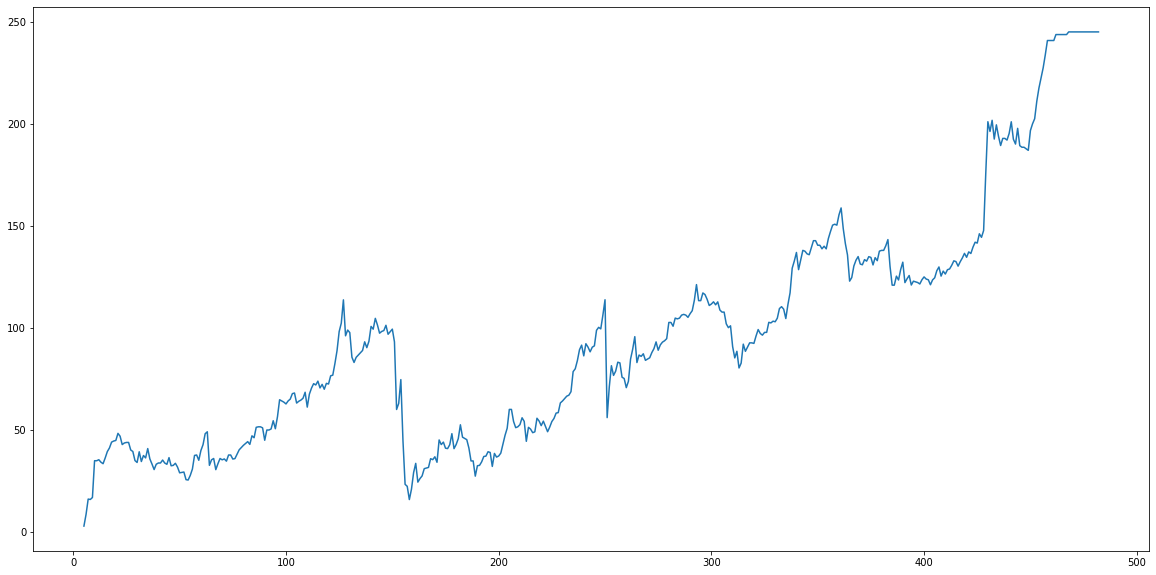

In [27]:
df_2['Net Cummulative Returns'] = (((df_2['Open Price'] - df_2['Close Price'])/(df_2['Open Price']))*100).cumsum()
plt.figure(figsize=(20,10))
plt.plot(df_2['Net Cummulative Returns'])